In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#print tensorflow version
tf.__version__

'2.1.0'

In [3]:
#check gpu is available or not
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
batch = 32
#Data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                      horizontal_flip=True,
                                      vertical_flip=True,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2)
train=train_datagen.flow_from_directory(r'C:\Users\Gundeep Gulati\Desktop\smoke and fire dataset\train data',
                                        target_size=(224,224),
                                        class_mode='binary',
                                        color_mode='rgb',
                                        batch_size=batch,
                                        subset='training')
validation=train_datagen.flow_from_directory(r'C:\Users\Gundeep Gulati\Desktop\smoke and fire dataset\train data',
                                        target_size=(224,224),
                                        class_mode='binary',
                                        color_mode='rgb',
                                        batch_size=batch,
                                        subset='validation')

Found 10987 images belonging to 2 classes.
Found 2746 images belonging to 2 classes.


In [5]:
#initialize CNN
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

In [9]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(r'C:\Users\Gundeep Gulati\Desktop\smoke and fire dataset\models\models.h5',
                                                monitor='val_loss',
                                                mode='min',
                                                save_best_only=True)
callbacks=[checkpoint]

In [10]:
#train model
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit_generator(train,
        validation_data=validation,
        epochs = 5,
        steps_per_epoch=train.samples//batch,
        validation_steps=validation.samples//batch,
        callbacks=callbacks)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 343 steps, validate for 85 steps
Epoch 1/5
343/343 [==============================] - 465s 1s/step - loss: 0.0343 - accuracy: 0.9939 - val_loss: 0.0135 - val_accuracy: 0.9974
Epoch 2/5
343/343 [==============================] - 469s 1s/step - loss: 0.0182 - accuracy: 0.9932 - val_loss: 0.0098 - val_accuracy: 0.9963
Epoch 3/5
343/343 [==============================] - 485s 1s/step - loss: 0.0150 - accuracy: 0.9938 - val_loss: 0.0079 - val_accuracy: 0.9963
Epoch 4/5
343/343 [==============================] - 450s 1s/step - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.0077 - val_accuracy: 0.9967
Epoch 5/5
343/343 [==============================] - 429s 1s/step - loss: 0.0147 - accuracy: 0.9946 - val_loss: 0.0080 - val_accuracy: 0.9971


In [11]:
from tensorflow.keras.models import load_model
cnn = load_model(r'C:\Users\Gundeep Gulati\Desktop\smoke and fire dataset\models\models.h5')

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

In [15]:
#testing on test data
from tensorflow.keras.preprocessing import image
import numpy as np
test_img = image.load_img(r'C:\Users\Gundeep Gulati\Desktop\smoke and fire dataset\train data\train_fire\1.png',target_size=(224,224))


In [16]:
test_img = image.img_to_array(test_img)
test_img = test_img/255
test_img = np.expand_dims(test_img,axis=0)
results = cnn.predict(test_img)

In [17]:
#0 for fire
results

array([[0.]], dtype=float32)

In [18]:
#testing on test data
from tensorflow.keras.preprocessing import image
import numpy as np
test_img = image.load_img(r'C:\Users\Gundeep Gulati\Desktop\smoke and fire dataset\test_small\smokeee3.png',target_size=(224,224))


In [19]:
test_img = image.img_to_array(test_img)
test_img = test_img/255
test_img = np.expand_dims(test_img,axis=0)
results = cnn.predict(test_img)

In [20]:
# near to 1 means smoke
results

array([[0.8114831]], dtype=float32)

In [21]:
#testing on test data
from tensorflow.keras.preprocessing import image
import numpy as np
test_img = image.load_img(r'C:\Users\Gundeep Gulati\Desktop\smoke and fire dataset\test_small\fume1.png',target_size=(224,224))


In [22]:
test_img = image.img_to_array(test_img)
test_img = test_img/255
test_img = np.expand_dims(test_img,axis=0)
results = cnn.predict(test_img)

In [23]:
# greater than 0.5 means smoke
results

array([[0.63995624]], dtype=float32)

In [34]:
#testing on test data
from tensorflow.keras.preprocessing import image
import numpy as np
import PIL
img_path=r'C:\Users\Gundeep Gulati\Desktop\smoke and fire dataset\test_small\fire12.png'
test_img = image.load_img(img_path,target_size=(224,224))


In [35]:
test_img = image.img_to_array(test_img)
test_img = test_img/255
test_img = np.expand_dims(test_img,axis=0)
results = cnn.predict(test_img)

In [36]:
# less than 0.5 means fire
results

array([[0.30196023]], dtype=float32)

Fire


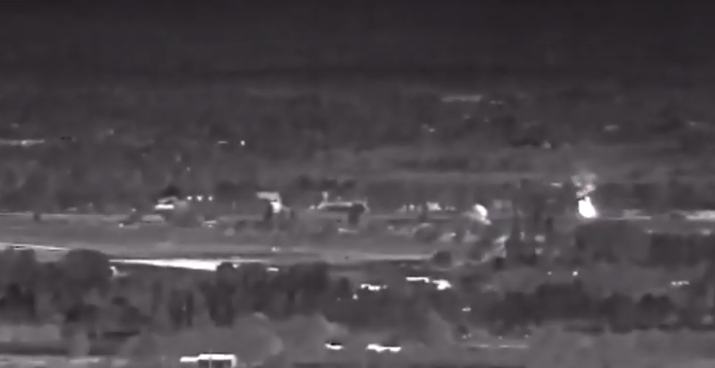

In [37]:
if results[0][0]:
    print('Fire')
else:
    print('Smoke')
    
PIL.Image.open(img_path)